In [92]:
from PIL import Image
from os import listdir
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

import numpy as np
import pickle

from functools import cmp_to_key

from sklearn.cluster import KMeans

In [93]:
from scipy.cluster.vq import *

Importneme to co potrebujeme...

Nacitame si obrazky.

In [94]:
def fn(x, y):
    fileName1 = x.split('.')[0]
    fileName2 = y.split('.')[0]
    return int(fileName1) - int(fileName2)
    

images = list(filter(lambda a: a.find('.png') != -1, listdir('font-images/data')))
images = sorted(images, key=cmp_to_key(fn))

images = list(map(lambda a: 'font-images/data/' + a, images))

Takto vyzeraju moje data... (sam som si ich nascrapoval :))

In [95]:
def alphabet(k):
    fig = plt.figure(figsize=(13, 2))
    s = k * 26

    for i in range(0, 26):
        img = np.array(Image.open(images[s + i], 'r'))
        fig.add_subplot(2, 13, i + 1)
        plt.imshow(img)

    plt.show()

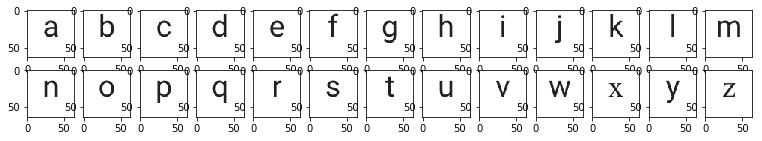

In [96]:
alphabet(0)

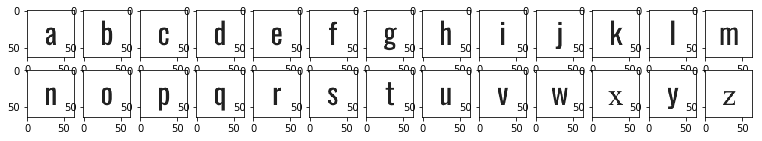

In [97]:
alphabet(8)

Spracujeme obrazky...

In [98]:
immatrix = np.array([np.array(Image.open(im)).flatten() for im in images], 'f')

Zoberieme KMeans.

In [101]:
cls = KMeans(n_clusters=26)

Polozime fit funkciu.

In [102]:
kmeans = cls.fit(immatrix)

Idem pozriet clustre, napr. ten prvy.

In [104]:
clusters = kmeans.labels_

In [123]:
def print_cluster(num):
    cluster = list(filter(lambda cluster_num: cluster_num[1] == num, enumerate(clusters)))
    size = len(cluster)
    
    fig = plt.figure(figsize=(20, 10))
    i = 0

    for image in cluster:
        i = i + 1
        img = np.array(Image.open(images[image[0]], 'r'))
        fig.add_subplot(10, 20, i)
        plt.imshow(img)

Pozrieme sa na prvy cluster.

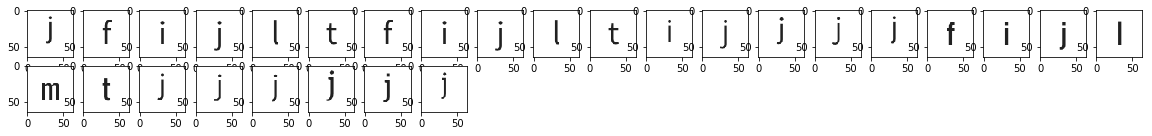

In [124]:
print_cluster(1)

Looool, vyzera to celkom dobre, vacisnu tam je _j_ , je tam aj _i_ co este chapem. Ale co tam robi _f, m a t (wtf?)_.

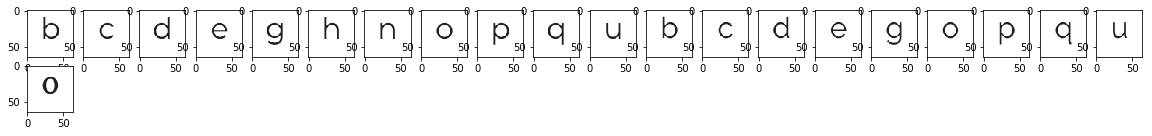

In [125]:
print_cluster(2)

Druhy cluster nespravilo uplne najlepsie, ale celkom moze byt. Mozem pozriet aj ostatne, ale neviem aky by to malo dalej zmysel.

Dufal som ze budem vediet rozoznat pismena z roznych fontov, to sa mi zial uplne nepodarilo.

Nabuduce to budem moct skusit vylepsit, alebo mozem skusit rozpoznavat cisla z roznych fontov. Mozem skusit rozne pristupy klastrovania a predspracovania (i ked to nebude treba) tych obrazkov, uvidime. :)

TODO: Pozriet velkosti zhukov. Pridat informacie do dat - napriklad. shapy - obluky, rovne ciary, atd. Vyhodnotenie clustrov. Clustrovanie cisiel. Skusit mozno DBSCAN... Porovnat vysledky...